In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

Reading CSV file

In [3]:
# Load Excel file
import pandas as pd
data = pd.read_csv("UberDataset.csv")
data.head()



START_DATE           END_DATE  CATEGORY        START  \
0  01-01-2016  21:11  01-01-2016  21:17  Business  Fort Pierce   
1  01-02-2016  01:25  01-02-2016  01:37  Business  Fort Pierce   
2  01-02-2016  20:25  01-02-2016  20:38  Business  Fort Pierce   
3  01-05-2016  17:31  01-05-2016  17:45  Business  Fort Pierce   
4  01-06-2016  14:42  01-06-2016  15:49  Business  Fort Pierce   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              NaN  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit

In [7]:
data.shape

(1158, 7)

In [8]:
data.describe()

MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000

In [9]:
columns = list(data)
columns

['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

                                                           #Check for blank or missing Values

In [10]:
data.isnull().any()

START_DATE    True
END_DATE      True
CATEGORY      True
START         True
STOP          True
MILES         True
PURPOSE       True
dtype: bool

In [11]:
data.isnull().sum()

START_DATE      2
END_DATE        3
CATEGORY        3
START           3
STOP            3
MILES           2
PURPOSE       505
dtype: int64

                                                                 #Replace empty strings with NaN

In [12]:
data.replace('', np.nan, inplace=True)

print(data)

             START_DATE           END_DATE  CATEGORY        START  \
0     01-01-2016  21:11  01-01-2016  21:17  Business  Fort Pierce   
1     01-02-2016  01:25  01-02-2016  01:37  Business  Fort Pierce   
2     01-02-2016  20:25  01-02-2016  20:38  Business  Fort Pierce   
3     01-05-2016  17:31  01-05-2016  17:45  Business  Fort Pierce   
4     01-06-2016  14:42  01-06-2016  15:49  Business  Fort Pierce   
...                 ...                ...       ...          ...   
1153  12-31-2016  21:32  12-31-2016  21:50  Business   Katunayake   
1154  12-31-2016  22:08  12-31-2016  23:51  Business      Gampaha   
1155             Totals                NaN       NaN          NaN   
1156                NaN                NaN       NaN          NaN   
1157                NaN                NaN       NaN          NaN   

                 STOP    MILES          PURPOSE  
0         Fort Pierce      5.1   Meal/Entertain  
1         Fort Pierce      5.0              NaN  
2         Fort Pierce

                                                       #Drop rows where all columns are NaN

In [13]:
data.dropna(how='all', inplace=True)

In [14]:
data.shape

(1156, 7)

In [ ]:
#Dropping the null values

In [15]:
data.dropna(inplace=True)


In [16]:
data.shape

(653, 7)

In [17]:
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

                                                               #Changing the datatypes of the columns

In [18]:
data['START_DATE']


0       01-01-2016  21:11
2       01-02-2016  20:25
3       01-05-2016  17:31
4       01-06-2016  14:42
5       01-06-2016  17:15
              ...        
1150    12-31-2016  01:07
1151    12-31-2016  13:24
1152    12-31-2016  15:03
1153    12-31-2016  21:32
1154    12-31-2016  22:08
Name: START_DATE, Length: 653, dtype: object

In [19]:
data['START_DATE']=pd.to_datetime(data['START_DATE'], format = '%m-%d-%Y %H:%M')

In [20]:
data['END_DATE']=pd.to_datetime(data['END_DATE'], format = '%m-%d-%Y %H:%M')

In [21]:
data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

                                                            #Finding out which day starts with '0'

In [22]:
print(calendar.day_name[0])  

Monday


                                #Creating Weekday, Month, Monthname day, hour, DayofWeek, year, dayname, weekday/weekend columns

In [23]:
hour=[]
day=[]
dayofweek=[]
month=[]
monthname=[]
weekday=[]
year=[]
dayname=[]
weekdayORweekend=[]

for x in data['START_DATE']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    monthname.append(x.month_name())
    weekday.append(x.day_name())
    year.append(x.year)
    if x.weekday() < 4:
        weekdayORweekend.append('Weekday')
    else:
        weekdayORweekend.append('Weekend')

data['HOUR']= hour
data['DAY']= day
data['DAYOFWEEK']= dayofweek
data['MONTH']= month
data['MONTHNAME']= monthname
data['WEEKDAY']= weekday
data['YEAR']= year
data['WEEKDAYORWEEKEND']=weekdayORweekend    

In [24]:
data.head()

START_DATE            END_DATE  CATEGORY            START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

              STOP  MILES          PURPOSE  HOUR  DAY  DAYOFWEEK  MONTH  \
0      Fort Pierce    5.1   Meal/Entertain    21    1          4      1   
2      Fort Pierce    4.8  Errand/Supplies    20    2          5      1   
3      Fort Pierce    4.7          Meeting    17    5          1      1   
4  West Palm Beach   63.7   Customer Visit    14    6          2      1   
5  West Palm Beach    4.3   Meal/Entertain    17    6          2      1   

  MONTHNAME    WEEKDAY  YEAR WEEKDAYORWEEKEND  
0   January     Friday  2016          Weekend  
2   January   Saturday  2016          Weekend  
3   January    Tuesday  2016          Weekday  
4   January  Wednesday  2016          Weekday  
5   January  Wednesday  2016          Weekday

                                                          #Finding out count of Purpose we have

In [25]:
data['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64

                                                              #Finding out count of Start we have

In [26]:
data['START'].value_counts()

START
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
El Cerrito            1
Fuquay-Varina         1
Krendle Woods         1
Katunayake            1
Gampaha               1
Name: count, Length: 131, dtype: int64

                                                         #Finding out count of stop we have

In [27]:
data['STOP'].value_counts()

STOP
Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
                   ... 
El Cerrito            1
Fuquay-Varina         1
Wake Co.              1
Gampaha               1
Ilukwatta             1
Name: count, Length: 137, dtype: int64

                                                       #Finding out count of miles we have

In [29]:
data['MILES'].value_counts()

MILES
9.9      26
3.1      21
10.4     17
6.1      13
2.1      13
         ..
103.0     1
23.2      1
12.3      1
10.7      1
48.2      1
Name: count, Length: 205, dtype: int64

                                                                      #Finding out Sum of miles: 

In [30]:
data['MILES'].sum()

np.float64(7311.200000000001)

                                                   #Finding out the Count of Categories or number of categories we have

In [31]:
data['CATEGORY'].value_counts()

CATEGORY
Business    647
Personal      6
Name: count, dtype: int64

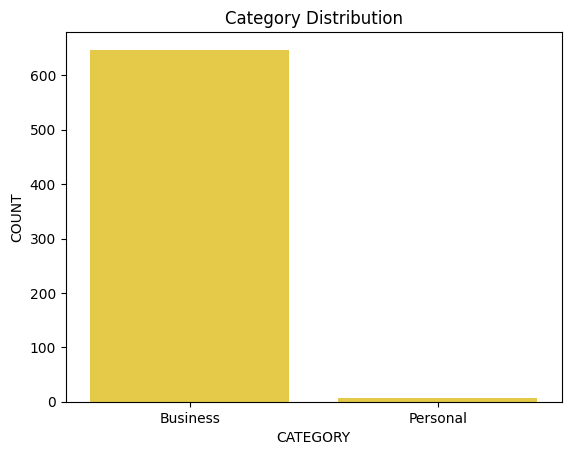

In [32]:
sns.countplot(x='CATEGORY', data=data, color = '#ffd92f')
plt.title('Category Distribution')
plt.xlabel('CATEGORY')
plt.ylabel('COUNT')
plt.show()


                                                  #Finding out count of miles we have

                                                       # Finding out Miles   

In [33]:
data['MILES'].value_counts()

MILES
9.9      26
3.1      21
10.4     17
6.1      13
2.1      13
         ..
103.0     1
23.2      1
12.3      1
10.7      1
48.2      1
Name: count, Length: 205, dtype: int64

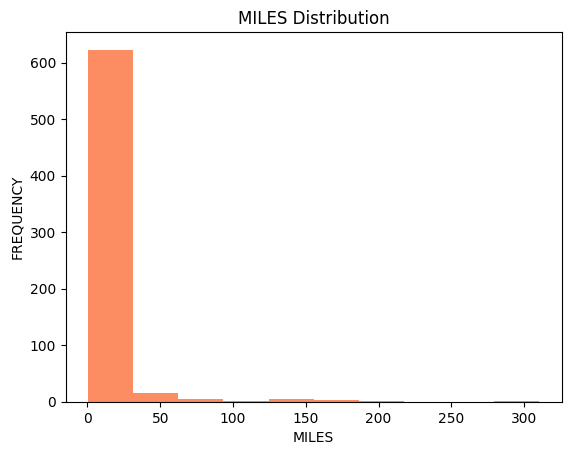

In [34]:
data['MILES'].plot.hist(x='MILES', color= '#fc8d62')
plt.title('MILES Distribution')
plt.xlabel('MILES')
plt.ylabel('FREQUENCY')
plt.show()


                                               Exploratory Data Analysis (EDA):

                                                   # Identifying peak ride hours 

In [35]:
data['HOUR'].value_counts()

HOUR
13    55
14    52
17    51
18    51
15    51
20    45
16    45
12    43
11    39
19    35
21    34
10    33
9     26
22    21
23    21
8     17
0     13
7      8
1      4
5      3
3      3
6      2
2      1
Name: count, dtype: int64

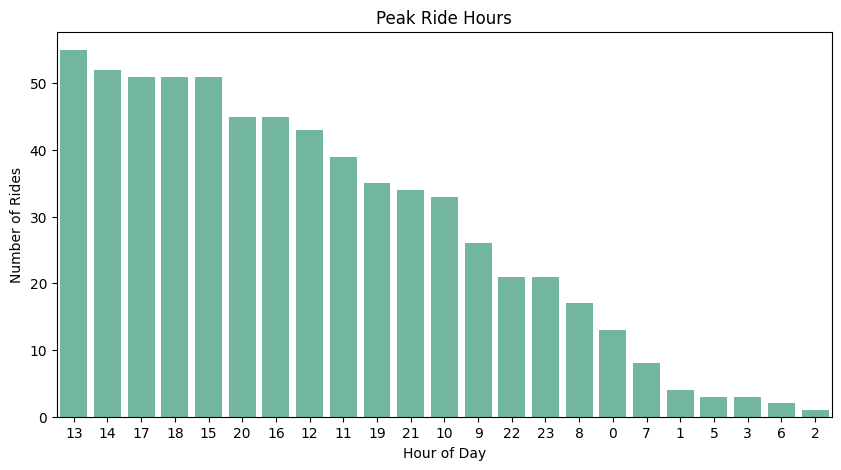

In [56]:
plt.figure(figsize=(10,5))
hour_of_day = data['HOUR'].value_counts().sort_values(ascending=False)
sns.countplot(x='HOUR', data=data, order= hour_of_day.index, color='#66c2a5')

plt.title('Peak Ride Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

In [57]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'HOUR', 'DAY', 'DAYOFWEEK', 'MONTH', 'MONTHNAME', 'WEEKDAY',
       'YEAR', 'WEEKDAYORWEEKEND'],
      dtype='object')

                                          Identifying Busiest days/Peak Ride Days of the week.

In [60]:
data['DAY'].value_counts()

DAY
21    31
18    30
19    30
29    30
4     28
12    27
28    27
8     25
1     25
22    24
7     23
20    22
6     22
5     21
14    21
11    21
26    20
3     20
27    20
25    19
10    19
2     18
24    18
13    17
15    16
17    16
16    15
23    14
30    12
9     12
31    10
Name: count, dtype: int64

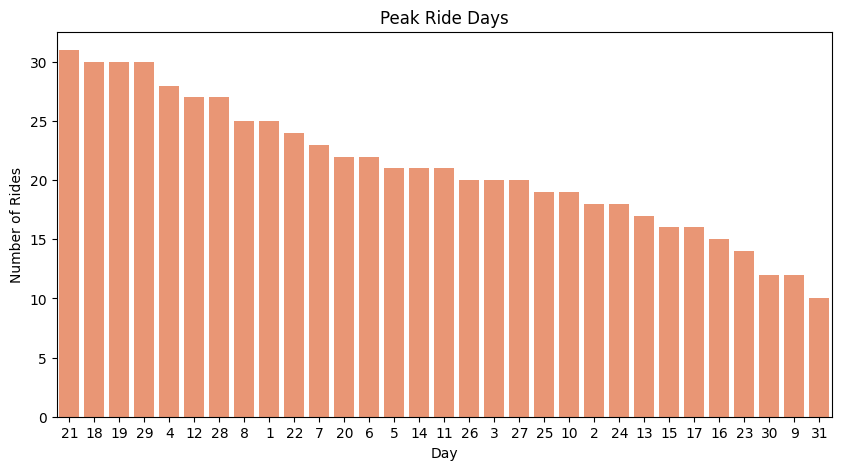

In [61]:
plt.figure(figsize=(10,5))
days = data['DAY'].value_counts().sort_values(ascending=False)
sns.countplot(x='DAY', data=data, order= days.index, color='#fc8d62')
plt.title('Peak Ride Days')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

                                                    # Identifying Peak Day of the Week

In [62]:
data['WEEKDAY'].value_counts()

WEEKDAY
Friday       125
Tuesday       94
Thursday      92
Monday        87
Sunday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64

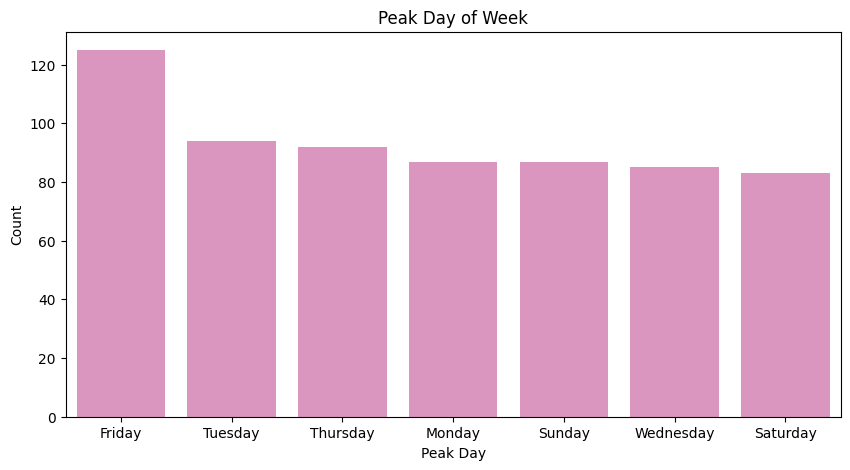

In [63]:
plt.figure(figsize=(10,5))
Weekdays = data['WEEKDAY'].value_counts().sort_values(ascending=False)
sns.countplot(x='WEEKDAY', data=data, order= Weekdays.index, color='#e78ac3')
plt.title('Peak Day of Week')
plt.xlabel('Peak Day')
plt.ylabel('Count')
plt.show()

                                                    # Identifying Peak Month of the Year

In [64]:
data['MONTH'].value_counts()

MONTH
12    134
2      82
6      73
3      71
11     60
1      59
4      50
7      46
5      46
10     20
8      12
Name: count, dtype: int64

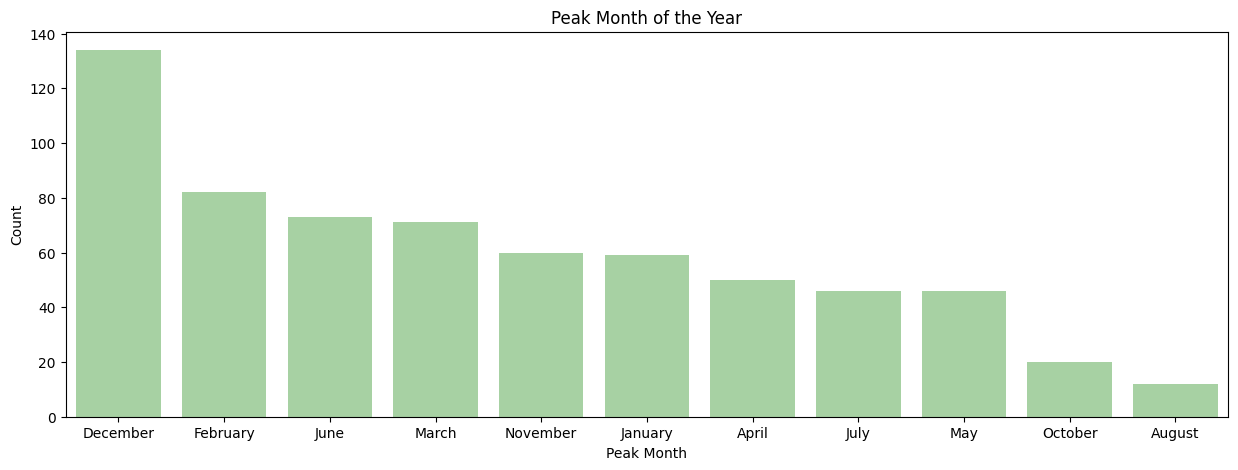

In [65]:
plt.figure(figsize=(15,5))
Month = data['MONTHNAME'].value_counts().sort_values(ascending=False)
sns.countplot(x='MONTHNAME', data=data, order= Month.index, color='#a1d99b')
plt.title('Peak Month of the Year')
plt.xlabel('Peak Month')
plt.ylabel('Count')
plt.show()


                                               #Identifying Busiest Days of the Week

In [66]:
data['WEEKDAY'].value_counts()

WEEKDAY
Friday       125
Tuesday       94
Thursday      92
Monday        87
Sunday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64

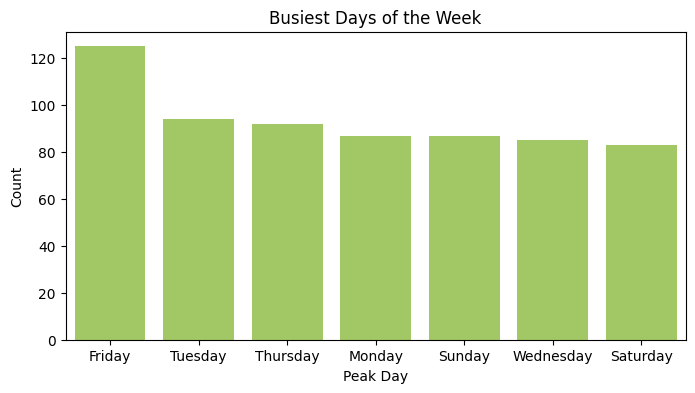

In [67]:
plt.figure(figsize=(8,4))
Peakday = data['WEEKDAY'].value_counts().sort_values(ascending=False)
sns.countplot(x='WEEKDAY', data=data, order=Peakday.index, color = '#a6d854')
plt.title('Busiest Days of the Week')
plt.xlabel('Peak Day')
plt.ylabel('Count')
plt.show()

                                                      #Calculating Trip Distance

In [68]:
data['TRIP DISTANCE (km)'] = data['MILES'] * 1.60934

In [69]:
data['TRIP DISTANCE (km)'].value_counts()

TRIP DISTANCE (km)
15.932466     26
4.988954      21
16.737136     17
9.816974      13
3.379614      13
              ..
165.762020     1
37.336688      1
19.794882      1
17.219938      1
77.570188      1
Name: count, Length: 205, dtype: int64

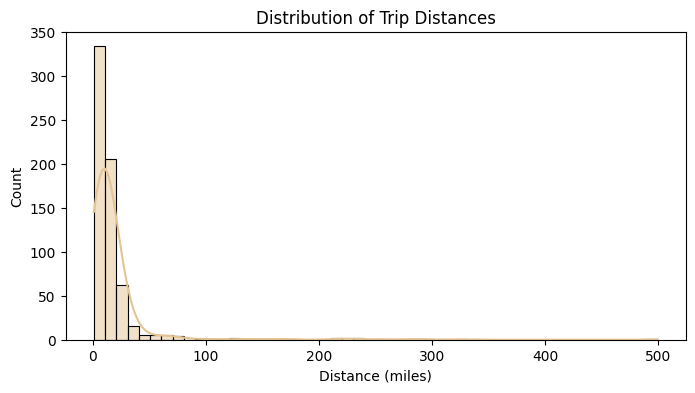

In [70]:
plt.figure(figsize=(8,4))
sns.histplot(data['TRIP DISTANCE (km)'], bins=50, kde=True, color = '#e5c494')
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.show()


                                                        #Calulating Fare Amount


Calculating Fare Amount

Fare=Base Fare+(Cost per Mile×Miles)+(Cost per Minute×Duration in Minutes)+Booking Fee


In [71]:
data['DURATION_(min)'] = (data['END_DATE']-data['START_DATE']).dt.total_seconds() / 60

In [72]:
# Assuming Uber fare components
base_fare = 2.00
cost_per_mile = 1.50
cost_per_minute = 0.25
booking_fee = 2.50

data['FARE_AMOUNT'] = base_fare + (data['MILES'] * cost_per_mile) + (data['DURATION_(min)'] * cost_per_minute) + booking_fee


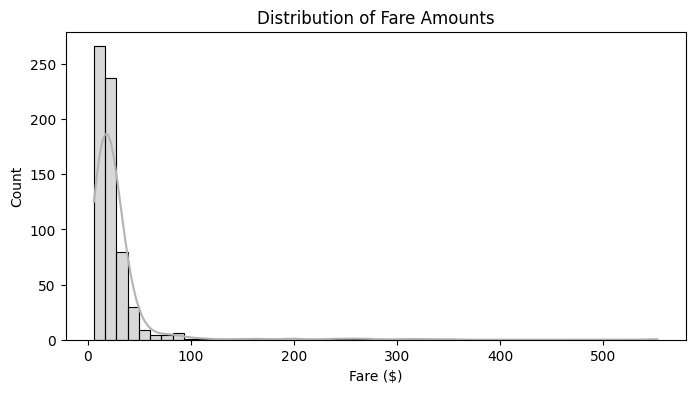

In [73]:
plt.figure(figsize=(8,4))
sns.histplot(data['FARE_AMOUNT'], bins=50, kde=True,  color = '#b3b3b3' )
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare ($)')
plt.show()

                                #Calculating Correlation between Trip Distance and Fare Amount

In [74]:
data.columns


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'HOUR', 'DAY', 'DAYOFWEEK', 'MONTH', 'MONTHNAME', 'WEEKDAY',
       'YEAR', 'WEEKDAYORWEEKEND', 'TRIP DISTANCE (km)', 'DURATION_(min)',
       'FARE_AMOUNT'],
      dtype='object')

In [75]:
correlation = data['TRIP DISTANCE (km)'].corr(data['FARE_AMOUNT'])
print(f"Correlation between Distance and Fare: {correlation}")

Correlation between Distance and Fare: 0.9977142591900039


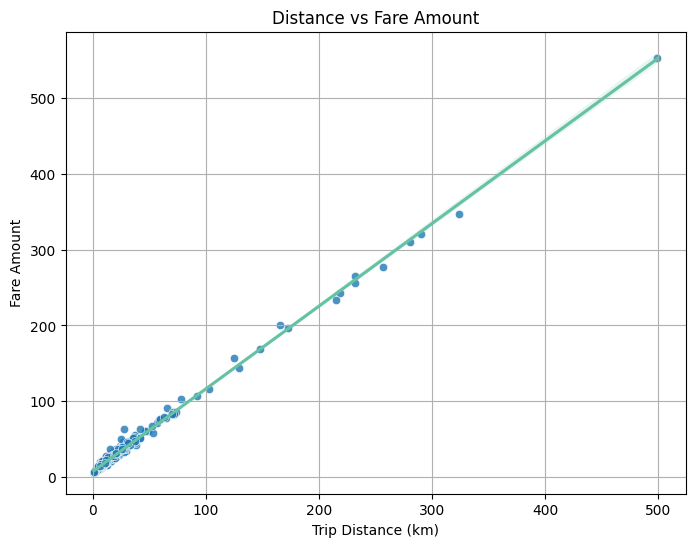

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TRIP DISTANCE (km)', y='FARE_AMOUNT', data=data, alpha=0.8)

# Add trend line
sns.regplot(x='TRIP DISTANCE (km)', y='FARE_AMOUNT', data=data, scatter=False, color='#66c2a5')

plt.title('Distance vs Fare Amount')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

                                                         # Most popular pickup and drop-off locations.

Top 10 Pickup Locations:
 START
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Karachi              26
Raleigh              21
Lahore               19
Islamabad            15
Midtown              11
Name: count, dtype: int64

Top 10 Drop-off Locations:
 STOP
Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Karachi              26
Raleigh              21
Lahore               19
Islamabad            14
Berkeley             11
Name: count, dtype: int64


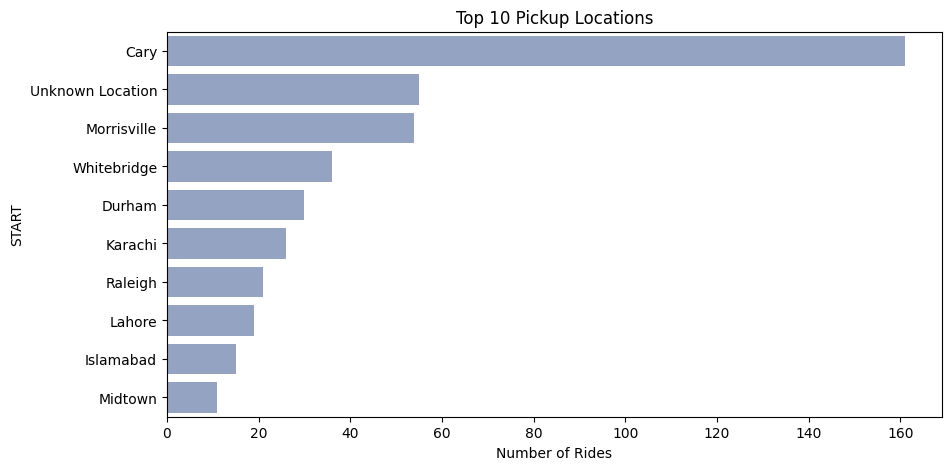

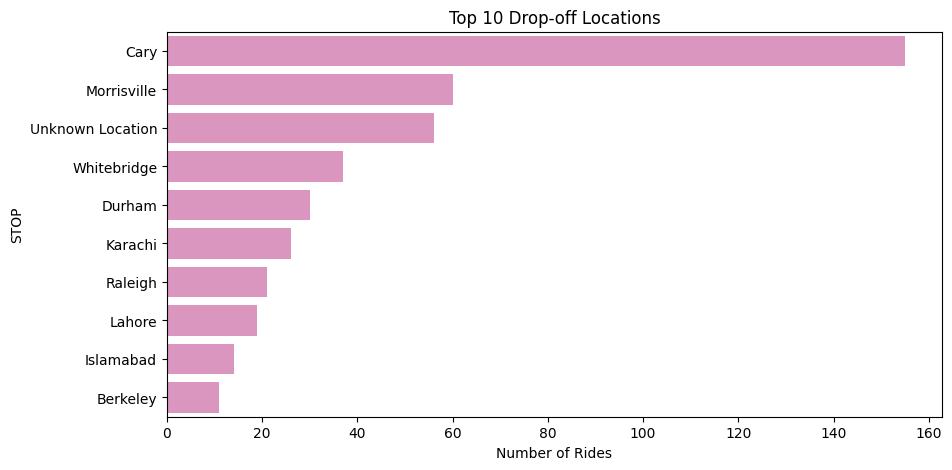

In [77]:
top_pickups = data['START'].value_counts().head(10)
top_dropoffs = data['STOP'].value_counts().head(10)
print("Top 10 Pickup Locations:\n", top_pickups)
print("\nTop 10 Drop-off Locations:\n", top_dropoffs)

# Visualize
plt.figure(figsize=(10,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, color = '#8da0cb')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Number of Rides')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, color = '#e78ac3')
plt.title('Top 10 Drop-off Locations')
plt.xlabel('Number of Rides')
plt.show()

                                                     #Identifying Peak Hour of the Day

In [78]:
data['HOUR'].value_counts()           

HOUR
13    55
14    52
17    51
18    51
15    51
20    45
16    45
12    43
11    39
19    35
21    34
10    33
9     26
22    21
23    21
8     17
0     13
7      8
1      4
5      3
3      3
6      2
2      1
Name: count, dtype: int64

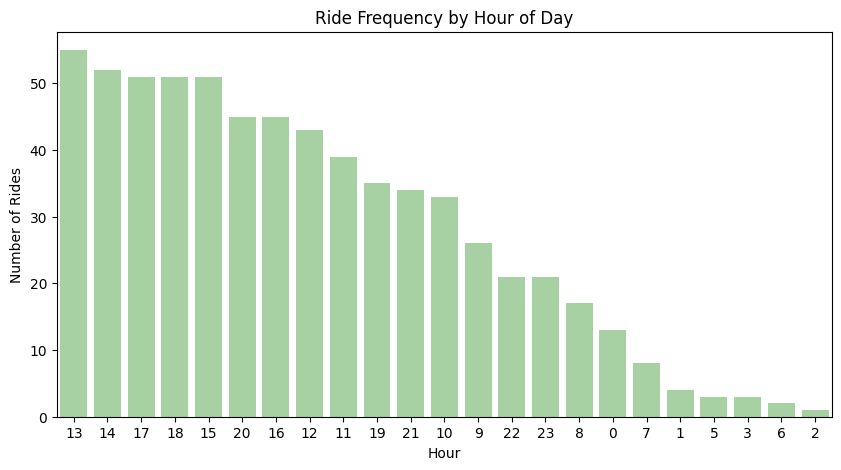

In [79]:
plt.figure(figsize=(10,5))
Hour = data['HOUR'].value_counts().sort_values(ascending=False)
sns.countplot(x='HOUR', data=data, order= Hour.index, color='#a1d99b')
plt.title('Ride Frequency by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.show()

                                                #Calulating Hourly Demand and Daily Demand

In [80]:
data.columns
data.head()

START_DATE            END_DATE  CATEGORY            START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

              STOP  MILES          PURPOSE  HOUR  DAY  DAYOFWEEK  MONTH  \
0      Fort Pierce    5.1   Meal/Entertain    21    1          4      1   
2      Fort Pierce    4.8  Errand/Supplies    20    2          5      1   
3      Fort Pierce    4.7          Meeting    17    5          1      1   
4  West Palm Beach   63.7   Customer Visit    14    6          2      1   
5  West Palm Beach    4.3   Meal/Entertain    17    6          2      1   

  MONTHNAME    WEEKDAY  YEAR WEEKDAYORWEEKEND  TRIP DISTANCE (km)  \
0   January     Friday  2016          Weekend            8.207634   
2   January   Saturday  2016          Weekend            7.724832   
3   January    Tuesday  2016          Weekday            7.563898   
4   January  Wednesday  2016          Weekday          102.514958   
5   January  Wednesday  2016          Weekday            6.920162   

   DURATION_(min)  FARE_AMOUNT  
0             6.0        13.65  
2            13.0        14.95  
3            14.0        15.05  
4            67.0       116.80  
5             4.0        11.95

                                                  # Identifying Hourly Ride Demand

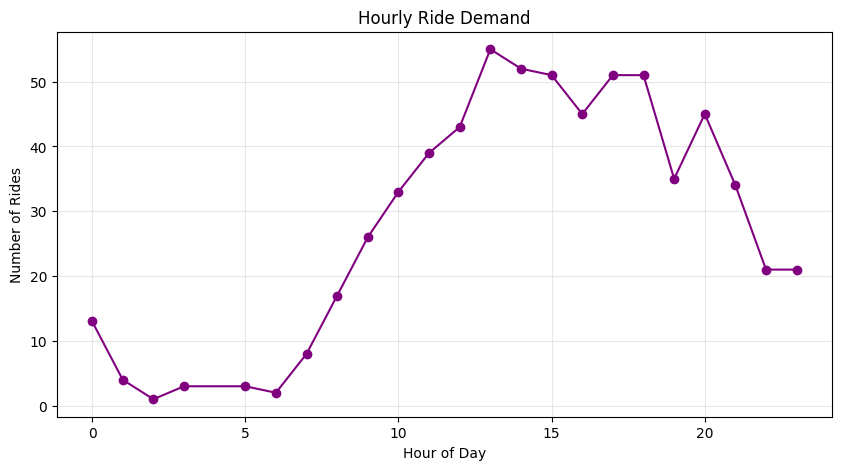

In [81]:
hourly_demand = data.groupby('HOUR').size()

plt.figure(figsize=(10,5))
hourly_demand.plot(kind='line', marker='o', color='purple')
plt.title('Hourly Ride Demand')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.grid(alpha=0.3)
plt.show()


                                                # Identifying Daily Ride Demand

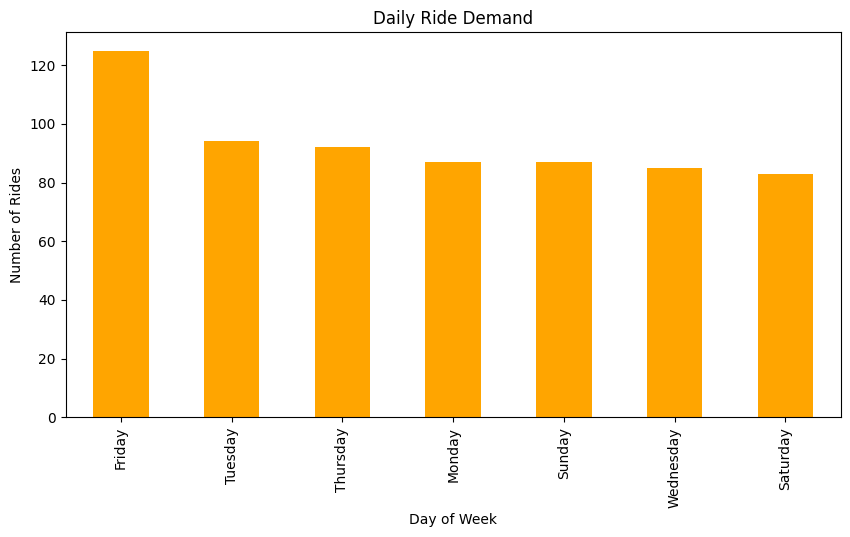

In [82]:
daily_demand = data['WEEKDAY'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
daily_demand.plot(kind='bar', color='orange')
plt.title('Daily Ride Demand')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()



                                         #Finding out how fares change based on distance and time

                                                     # Identifying Fare vs Trip Distance

In [83]:
data.columns


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'HOUR', 'DAY', 'DAYOFWEEK', 'MONTH', 'MONTHNAME', 'WEEKDAY',
       'YEAR', 'WEEKDAYORWEEKEND', 'TRIP DISTANCE (km)', 'DURATION_(min)',
       'FARE_AMOUNT'],
      dtype='object')

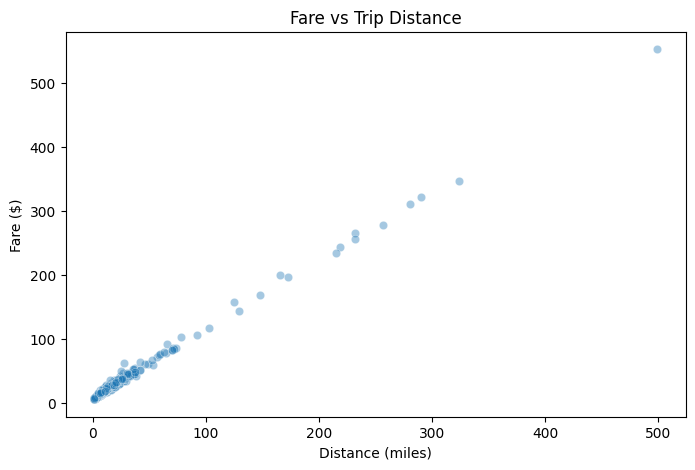

                    TRIP DISTANCE (km)  FARE_AMOUNT
TRIP DISTANCE (km)            1.000000     0.997714
FARE_AMOUNT                   0.997714     1.000000


In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='TRIP DISTANCE (km)', y='FARE_AMOUNT', data=data, alpha=0.4)
plt.title('Fare vs Trip Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare ($)')
plt.show()
# Correlation
corr = data[['TRIP DISTANCE (km)', 'FARE_AMOUNT']].corr()
print(corr)

                                                 #Fares by Time of Day (Impact of Peak Hours)

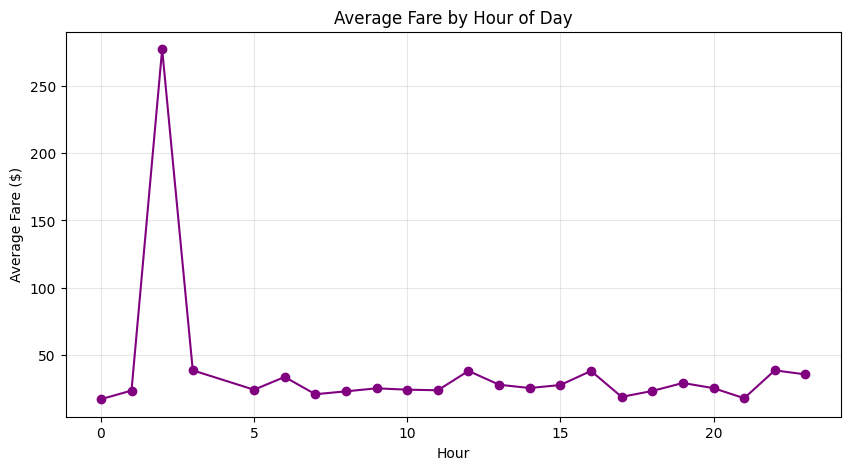

                 HOUR  FARE_AMOUNT
HOUR         1.000000    -0.004547
FARE_AMOUNT -0.004547     1.000000


In [85]:
hourly_fares = data.groupby('HOUR')['FARE_AMOUNT'].mean()

plt.figure(figsize=(10,5))
hourly_fares.plot(kind='line', marker='o', color='purple')
plt.title('Average Fare by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Fare ($)')
plt.grid(alpha=0.3)
plt.show()

corr = data[['HOUR','FARE_AMOUNT']].corr()
print(corr)



                                                        #Peak Hours and Fares

In [86]:
# Define peak hours
peak_hours = data[(data['HOUR'].between(7,9)) | (data['HOUR'].between(17,20))]
non_peak_hours = data[~data['HOUR'].between(7,9) & ~data['HOUR'].between(17,20)]

avg_peak_fare = peak_hours['FARE_AMOUNT'].mean()
avg_non_peak_fare = non_peak_hours['FARE_AMOUNT'].mean()

print(f"Average Fare (Peak Hours): ${avg_peak_fare:.2f}")
print(f"Average Fare (Non-Peak Hours): ${avg_non_peak_fare:.2f}")


Average Fare (Peak Hours): $23.45
Average Fare (Non-Peak Hours): $29.19


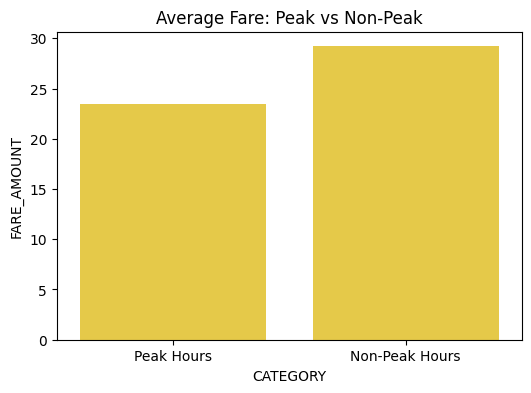

In [87]:
fare_comparison = pd.DataFrame({
    'CATEGORY': ['Peak Hours', 'Non-Peak Hours'],
    'FARE_AMOUNT': [avg_peak_fare, avg_non_peak_fare]
})

plt.figure(figsize=(6,4))
sns.barplot(x='CATEGORY', y='FARE_AMOUNT', data=fare_comparison, color = '#ffd92f')
plt.title('Average Fare: Peak vs Non-Peak')
plt.show()